### Imports

In [1]:
from skimage.io import imread
from skimage.filters import gaussian
import numpy as np
from matplotlib import pyplot as plt

In [71]:
from skimage.color import rgb2gray

mittens = imread('./data/murder_mittens.jpg')

gray_mitts = rgb2gray(mittens)

# Generate 4 Layer Gaussian Pyramid

In [106]:
from skimage.transform import pyramid_laplacian

rows, cols, dim = mittens.shape
pyramid = tuple(pyramid_laplacian(gray_mitts, order=4, multichannel=False))

len(pyramid)
#plt.imshow(pyramid[8])
    


#composite_image = np.zeros((rows, cols + cols // 2, 3), dtype=np.double)

#composite_image[:rows, :cols, :] = pyramid[0]

#i_row = 0
#for p in pyramid[1:]:
#    n_rows, n_cols = p.shape[:2]
#    composite_image[i_row:i_row + n_rows, cols:cols + n_cols] = p
#    i_row += n_rows

#fig, ax = plt.subplots()
#ax.imshow(composite_image)
#plt.show()

13

# Background Subtraction (single image)

In [4]:
from skimage import img_as_float
background = imread('./data/bg000.bmp')
woman = imread('./data/walk.bmp')

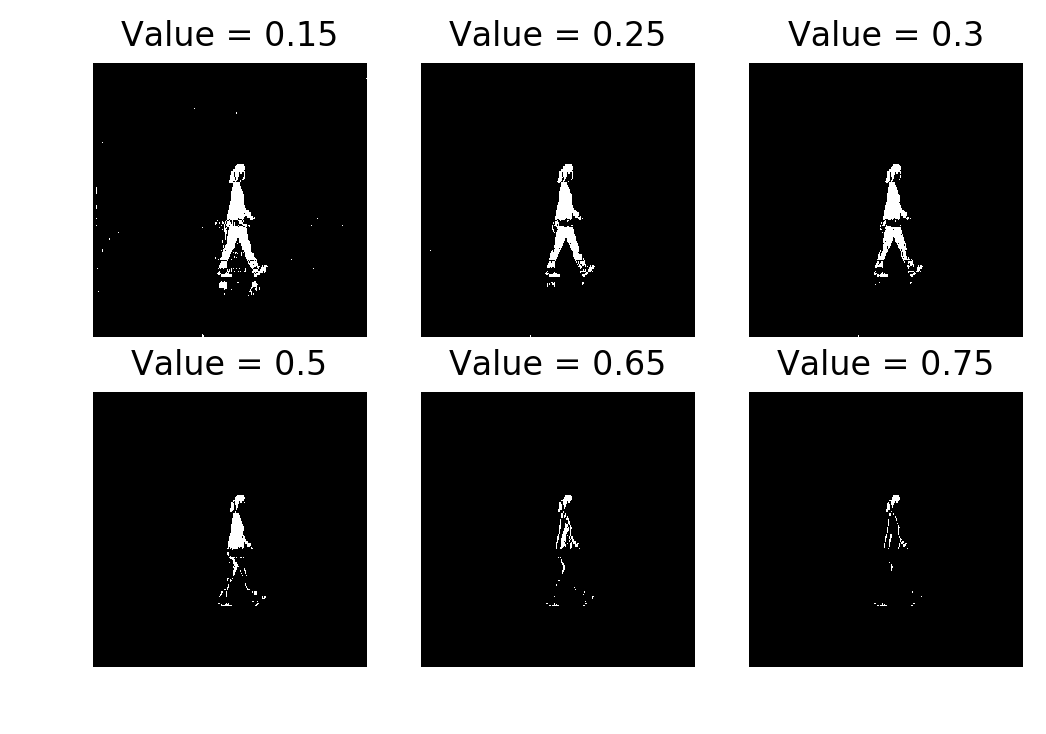

In [69]:
background = img_as_float(background)
woman = img_as_float(woman)

diff = np.abs(np.subtract(woman, background))

threshLevels = [0.15, 0.25, 0.3, 0.50, 0.65, 0.75]
f, axarr = plt.subplots(2, 3, sharex='col', sharey='row', dpi=200)
for thresh in threshLevels:
    tImg = diff > thresh
    idx = threshLevels.index(thresh)
    #print((int(idx/3), idx%3))
    axarr[int(idx/3), idx%3].axis('off')
    axarr[int(idx/3), idx%3].set_title(f'Value = {thresh}')
    axarr[int(idx/3), idx%3].imshow(tImg, cmap = 'gray', aspect='auto')

# Background Subtraction (multiple images)

In [14]:
background_cube = []

for i in range(30):
    tmp = imread('./data/bg{:03}.bmp'.format(i))
    tmp = img_as_float(tmp)
    background_cube.append(tmp)

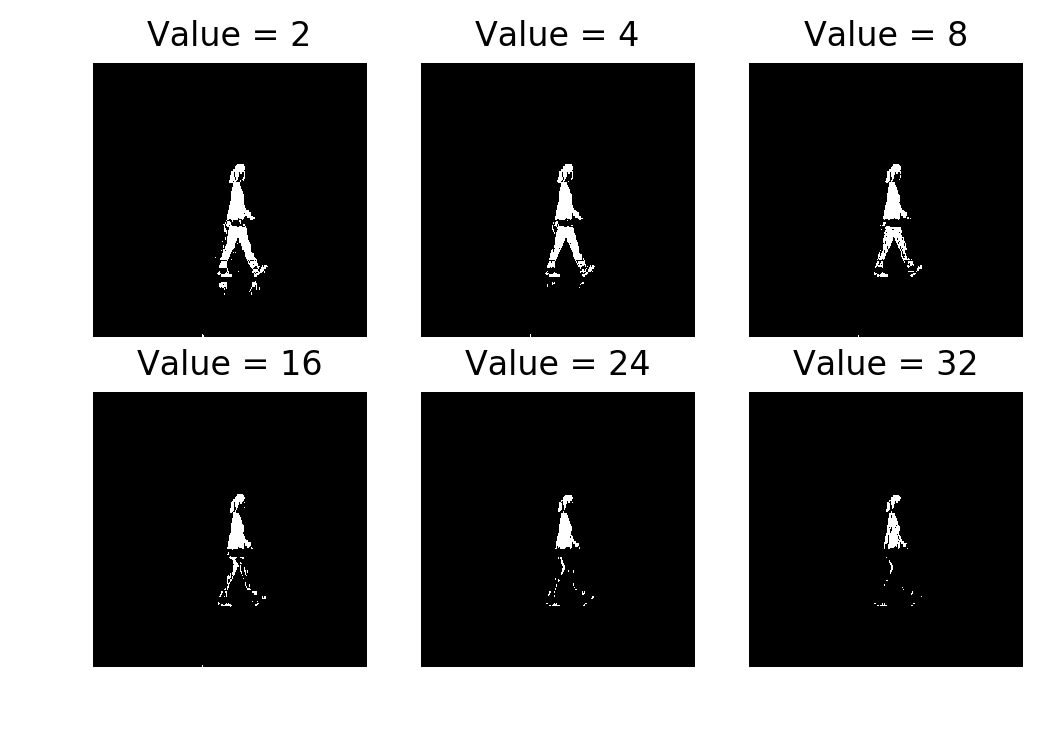

In [64]:
background_cube = np.array(background_cube)

background_mean = np.mean(background_cube, axis=0)

background_std = np.std(background_cube, axis=0) + 0.1

diff_mahalanobis = np.divide(np.square(np.subtract(woman, mean)), np.square(background_std))

threshLevels = [2, 4, 8, 16, 24, 32]
f, axarr = plt.subplots(2, 3, sharex='col', sharey='row', dpi=200)
for thresh in threshLevels:
    tImg = diff_mahalanobis > thresh
    idx = threshLevels.index(thresh)
    #print((int(idx/3), idx%3))
    axarr[int(idx/3), idx%3].axis('off')
    axarr[int(idx/3), idx%3].set_title(f'Value = {thresh}')
    axarr[int(idx/3), idx%3].imshow(tImg, cmap = 'gray', aspect='auto')
    
thresh = diff_mahalanobis > 4

# Dilate image

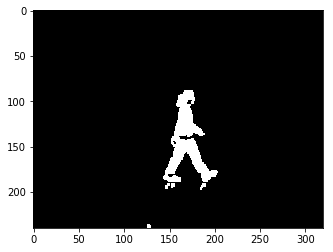

In [65]:
from skimage.morphology import dilation
from skimage.morphology import square

plt.imshow(dilation(thresh, square(3)), cmap='gray')


# Connected Components Algorithm

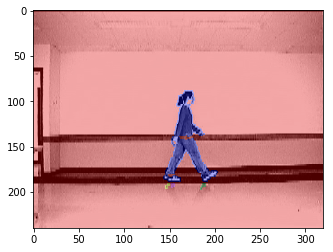

In [66]:
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.morphology import closing, square
from skimage.color import label2rgb

bw = dilation(thresh, square(3))

cleared = clear_border(bw)

label_image = label(cleared)
image_label_overlay = label2rgb(label_image, image=woman)

plt.imshow(image_label_overlay)